In [1]:
from matplotlib import pyplot as plt
from whar_datasets.adapters.torch_adapter import TorchAdapter
from whar_datasets.support.getter import WHARDatasetID, get_dataset_cfg

In [8]:
cfg = get_dataset_cfg(WHARDatasetID.HGDB)

cfg.parallelize = False
cfg.in_memory = False
force_recompute = True
#force_recompute = [False, True, True]

In [10]:
dataset = TorchAdapter(cfg)
dataset.preprocess(force_recompute)
dataset.postprocess(split_group_index=0, force_recompute=force_recompute)

2025-12-12 11:54:01,431 - whar-datasets - INFO - Forcing recompute
2025-12-12 11:54:01,431 - whar-datasets - INFO - Running DownloadingStep
2025-12-12 11:54:01,431 - whar-datasets - INFO - Checking hash for DownloadingStep
2025-12-12 11:54:01,443 - whar-datasets - INFO - Hash is up to date
2025-12-12 11:54:01,445 - whar-datasets - INFO - Downloading hgdb to datasets\hgdb\data\HumanGaitDataBase.zip
2025-12-12 11:54:05,371 - whar-datasets - INFO - Extracting hgdb
2025-12-12 11:54:11,842 - whar-datasets - INFO - Forcing recompute
2025-12-12 11:54:11,842 - whar-datasets - INFO - Running ParsingStep
2025-12-12 11:54:11,844 - whar-datasets - INFO - Checking hash for ParsingStep
2025-12-12 11:54:11,852 - whar-datasets - INFO - Hash is up to date
2025-12-12 11:54:11,858 - whar-datasets - INFO - Checking download
2025-12-12 11:54:11,861 - whar-datasets - INFO - Download exists
2025-12-12 11:54:11,865 - whar-datasets - INFO - Parsing to common format
Creating sessions: 100%|██████████| 4093/4093

In [11]:
loaders = dataset.get_dataloaders(batch_size=32)

train_loader = loaders["train"]
test_loader = loaders["test"]
val_loader = loaders["val"]

In [12]:
weights = dataset.get_class_weights(test_loader)
print(weights)

{0: 0.012271484024125208, 7: 0.02366370283779908, 4: 0.02574931732519832, 2: 0.06968851936636243, 3: 0.07995840643087901, 9: 0.08256574577101636, 10: 0.10405546042374664, 1: 0.10698660015399303, 5: 1.899012152733376, 6: 7.596048610933504, 8: -1, 11: -1}


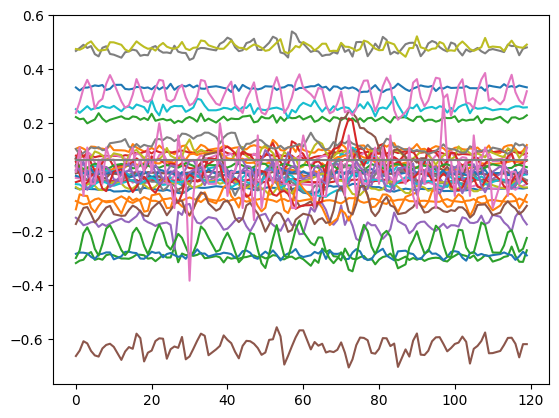

In [13]:
y_batch, x_batch = next(iter(train_loader))
x = x_batch[0].numpy()
plt.plot(x)
plt.show()